##Object Length Graph

Development Envrionment
<br/>xml Parsing
<br/>Object Length Calculation
<br/>Object Length Plot

#Development Envrionment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install PyPDF2

In [ ]:
import os
import cv2
import random
import pandas as pd
from glob import glob
from termcolor import colored
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import HTML
from IPython.display import display
from PyPDF2 import PdfFileReader, PdfFileMerger
from matplotlib.backends.backend_pdf import PdfPages

In [ ]:
import xml.etree.ElementTree as ET
import xml.etree.ElementTree

#xml Parsing

In [ ]:
xml_folder_path = '/content/drive/MyDrive/Aiffelthon/eda/xml_data'
xml_folder_list = [xml_folder_path + '/train/train_part1_xml', xml_folder_path + '/train/train_part2_xml',
                   xml_folder_path + '/validation/vaildation_xml']

In [ ]:
def xml_file_list(xml_folder):
  label = glob(xml_folder+'/labelXml'+'/*')
  label = sorted(label, reverse=False)
  label = sorted(label, key=len)
  return label

In [ ]:
for i in xml_folder_list:
  if 'train_part1' in i:
    train_part1_label = xml_file_list(i)
  elif 'train_part2' in i:
    train_part2_label = xml_file_list(i)
  elif 'validation' in i:
    validation_label = xml_file_list(i)

In [ ]:
train_label = train_part1_label + train_part2_label

#Object Length Calculation

In [ ]:
tree = ET.parse(train_label[0])
root = tree.getroot()
print(root[0][0].text)
print()

class_name_list = []
file_point_list = []

for i in root[3]:
  for child in i[3]:
    class_name_list.append(child.text)
    class_point_list = []
    for j in range(len(i[4])):
      class_point_tuple = []
      points = i[4][j].text.split(',')
      for point in points:
        point = float(point)
        class_point_tuple.append(point)
      class_point_tuple = tuple(class_point_tuple)
      class_point_list.append(class_point_tuple)
    file_point_list.append(class_point_list)     

for i, j in zip(class_name_list, file_point_list):
  print(i, j)

0.tif

Liquid Cargo Ship [(1275.0, 458.0), (1494.0, 88.0), (1417.0, 43.0), (1199.0, 414.0), (1275.0, 458.0)]
Passenger Ship [(630.0, 403.0), (586.0, 385.0), (582.0, 397.0), (625.0, 414.0), (630.0, 403.0)]
Dry Cargo Ship [(591.0, 1531.0), (761.0, 1377.0), (718.0, 1332.0), (549.0, 1486.0), (591.0, 1531.0)]


[TUTORIAL 2: CUSTOMIZE DATASETS](https://mmrotate.readthedocs.io/en/latest/tutorials/customize_dataset.html)

The annotation txt files in DOTA format:
<br/>Polygons with format (x1, y1, x2, y2, x3, y3, x4, y4)

[How to calculate area of a polygon with latitude and longitude?](https://stackoverflow.com/questions/45733838/how-to-calculate-area-of-a-polygon-with-latitude-and-longitude)

In [ ]:
import tifffile as tiff
from shapely.geometry import Polygon

In [ ]:
object_polygon_list = []
object_length_list = []

for points in file_point_list:
  object_polygon = Polygon(points)
  object_length = object_polygon.length
  object_polygon_list.append(object_polygon)
  object_length_list.append(object_length)

In [ ]:
for i, j, k in zip(class_name_list, file_point_list, object_length_list):
  print(i, j, k)

Liquid Cargo Ship [(1275.0, 458.0), (1494.0, 88.0), (1417.0, 43.0), (1199.0, 414.0), (1275.0, 458.0)] 1037.265872144639
Passenger Ship [(630.0, 403.0), (586.0, 385.0), (582.0, 397.0), (625.0, 414.0), (630.0, 403.0)] 118.51012599707451
Dry Cargo Ship [(591.0, 1531.0), (761.0, 1377.0), (718.0, 1332.0), (549.0, 1486.0), (591.0, 1531.0)] 581.819737695256


#Object Length Plot

In [ ]:
tree = ET.parse(train_label[0])
root = tree.getroot()

class_name_list = []
file_point_list = []

for i in root[3]:
  for child in i[3]:
    if 'Dump Truck' == child.text or 'Cargo Truck' == child.text or  'Truck Tractor'  == child.text \
    or 'Tractor' == child.text or 'Excavator' == child.text or 'Trailer' == child.text or 'Van' == child.text \
    or 'Small Car' == child.text or 'Bus' == child.text or 'other-vehicle' == child.text:
      class_name = 'vehicle'
      class_name_list.append(class_name)
    elif 'A220' == child.text or 'A321' == child.text or 'A330' == child.text or  'A350' == child.text \
    or 'Boeing737' == child.text or 'Boeing747' == child.text or 'Boeing777' == child.text or 'Boeing787' == child.text \
    or 'ARJ21' == child.text or 'C919' == child.text or 'other-airplane' == child.text:
      class_name = 'airplane'
      class_name_list.append(class_name)
    elif 'Dry Cargo Ship' == child.text or 'Liquid Cargo Ship' == child.text or 'Motorboat' == child.text \
    or 'Fishing Boat' == child.text or 'Tugboat' == child.text or 'Engineering Ship' == child.text \
    or 'Warship' == child.text or 'Passenger Ship' == child.text or 'other-ship' == child.text:
      class_name = 'ship'
      class_name_list.append(class_name)
    class_point_list = []
    for j in range(len(i[1].tag)):
      class_point_tuple = []
      points = i[4][j].text.split(',')
      for point in points:
        point = float(point)
        class_point_tuple.append(point)
      class_point_tuple = tuple(class_point_tuple)
      class_point_list.append(class_point_tuple)
    file_point_list.append(class_point_list)     

  object_polygon_list = []
  object_size_list = []

  for points in file_point_list:
    object_polygon = Polygon(points)
    object_size = object_polygon.area
    object_polygon_list.append(object_polygon)
    object_size_list.append(object_size)

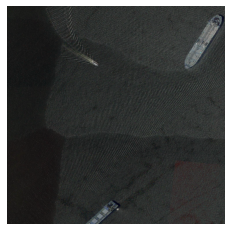

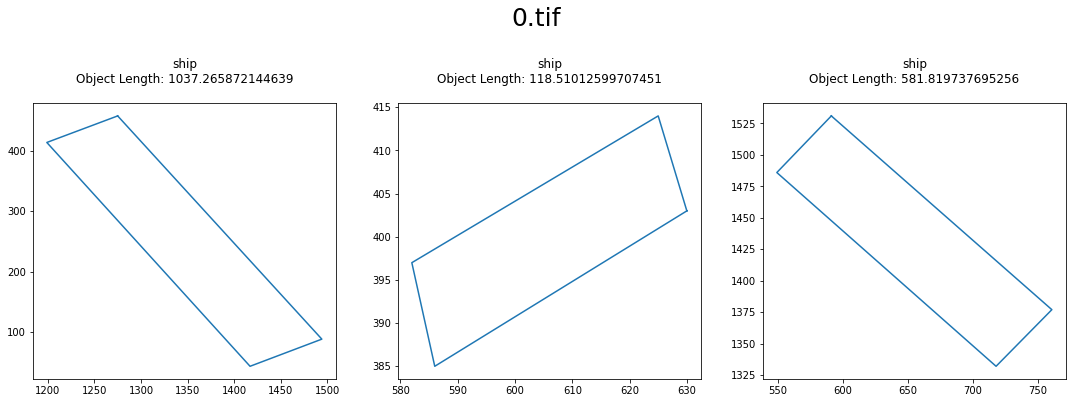

In [ ]:
sample_tif = tiff.imread('/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train/0.tif')
plt.imshow(cv2.cvtColor(sample_tif, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
print("\n" * 2)

plt.figure(figsize=(15, 5))
for i in range(len(class_name_list)):
  plt.subplot(1, 3, i+1)
  plt.title(class_name_list[i] + "\n" + "Object Length: " + str(object_length_list[i]) + "\n")
  x,y = object_polygon_list[i].exterior.xy
  plt.plot(x,y)
  
plt.suptitle(root[0][0].text + "\n", size=25, verticalalignment='baseline')
plt.tight_layout(h_pad=4, w_pad=3)
plt.savefig('/content/drive/MyDrive/Aiffelthon/eda/object_length/0_class_length.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()

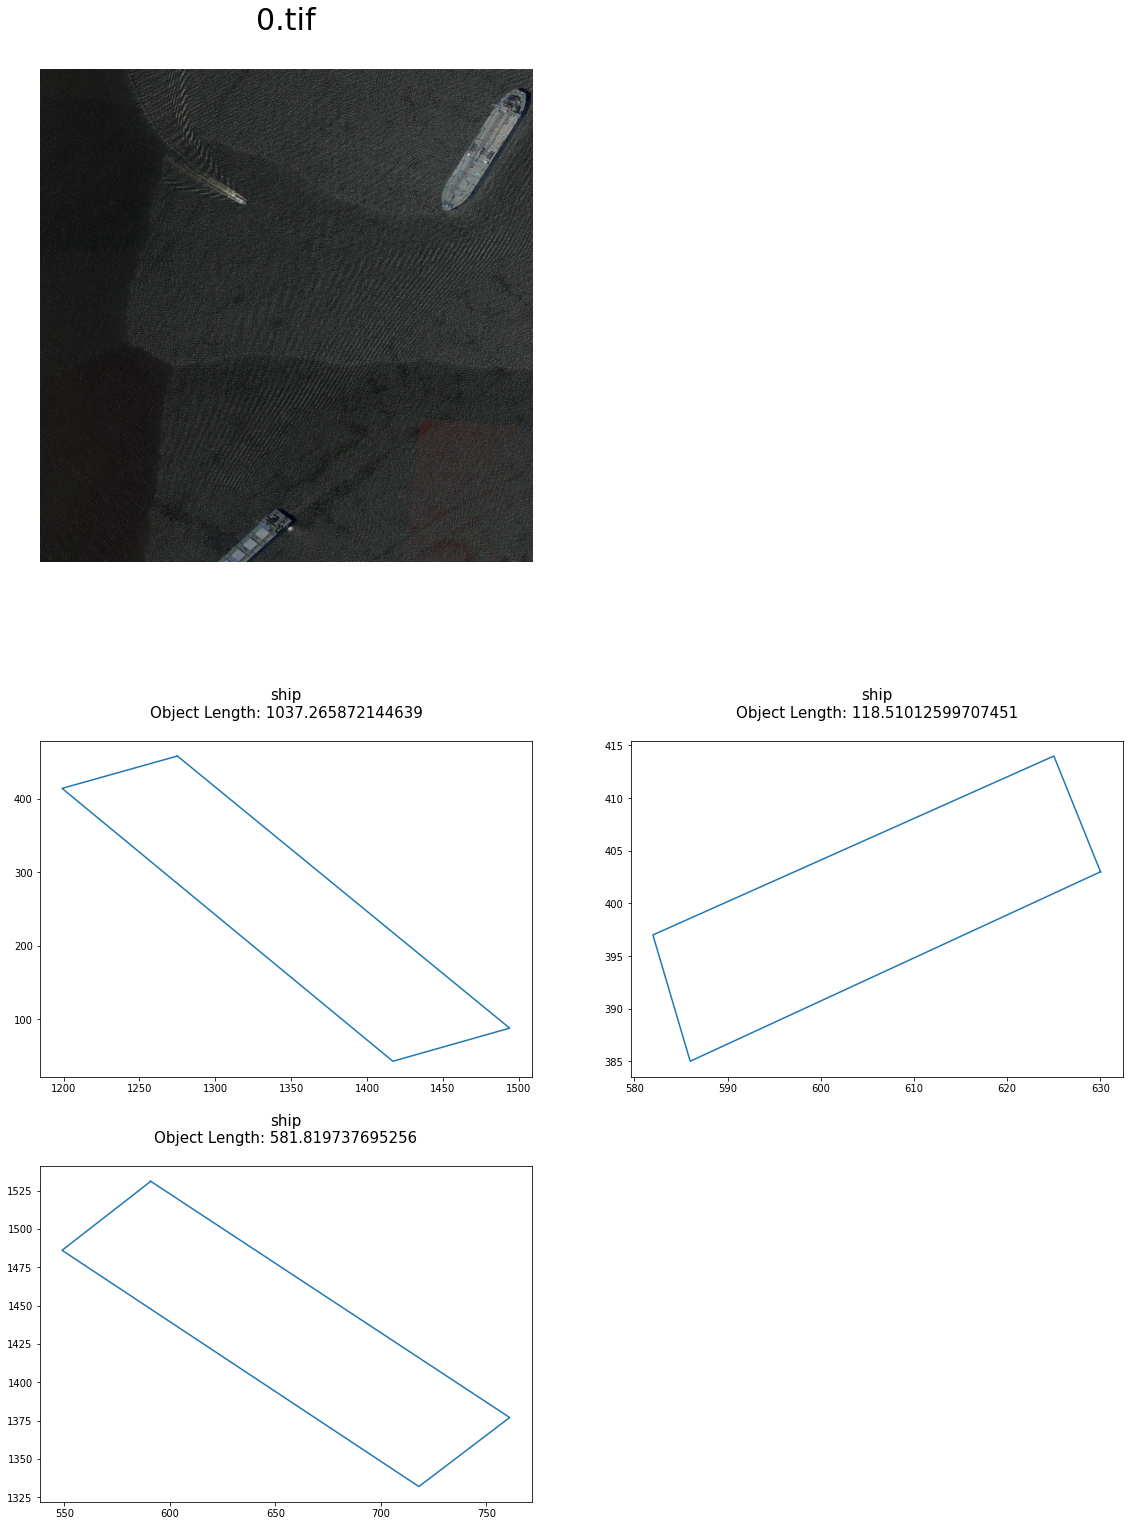

In [ ]:
fig = plt.figure(figsize=(30, 28))
gs = gridspec.GridSpec(nrows=3, ncols=3, height_ratios=[2, 1, 1], width_ratios=[1, 1, 1])

ax0 = fig.add_subplot(gs[0])
ax0.set_title(root[0][0].text + "\n", size=30)
sample_tif = tiff.imread('/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train/0.tif')
plt.imshow(cv2.cvtColor(sample_tif, cv2.COLOR_BGR2RGB))
plt.axis('off')

ax3 = fig.add_subplot(gs[3])
ax3.set_title(class_name_list[0] + "\n" + "Object Length: " + str(object_length_list[0]) + "\n", size=15)
x,y = object_polygon_list[0].exterior.xy
plt.plot(x,y)

ax4 = fig.add_subplot(gs[4])
ax4.set_title(class_name_list[1] + "\n" + "Object Length: " + str(object_length_list[1]) + "\n", size=15)
x,y = object_polygon_list[1].exterior.xy
plt.plot(x,y)

ax6 = fig.add_subplot(gs[6])
ax6.set_title(class_name_list[2] + "\n" + "Object Length: " + str(object_length_list[2]) + "\n", size=15)
x,y = object_polygon_list[2].exterior.xy
plt.plot(x,y)
  
plt.savefig('/content/drive/MyDrive/Aiffelthon/eda/object_length/0_class_length_with_tif.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')
plt.show()  

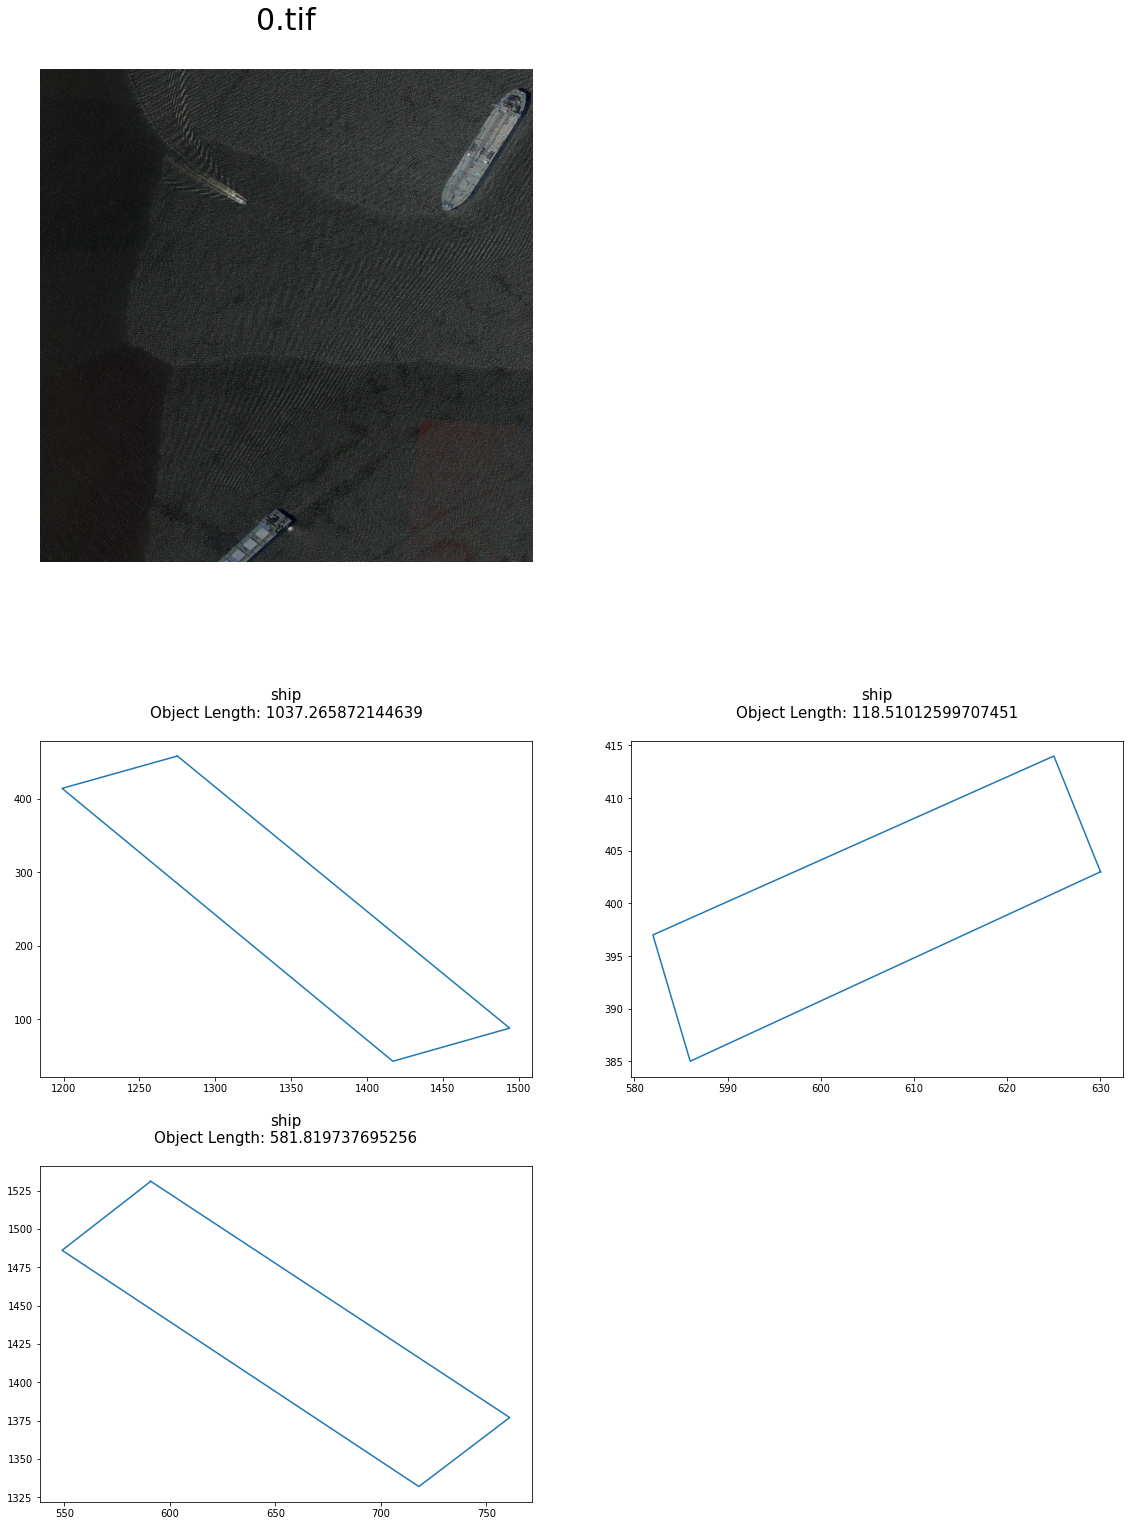

In [ ]:
with PdfPages('/content/drive/MyDrive/Aiffelthon/eda/pdf/0_class_length_tif.pdf') as pdf:

  fig = plt.figure(figsize=(30, 28))
  gs = gridspec.GridSpec(nrows=3, ncols=3, height_ratios=[2, 1, 1], width_ratios=[1, 1, 1])

  ax0 = fig.add_subplot(gs[0])
  ax0.set_title(root[0][0].text + "\n", size=30)
  sample_tif = tiff.imread('/content/drive/MyDrive/Aiffelthon/mmrotate/data/fair1m2.0/images_train/0.tif')
  plt.imshow(cv2.cvtColor(sample_tif, cv2.COLOR_BGR2RGB))
  plt.axis('off')

  ax3 = fig.add_subplot(gs[3])
  ax3.set_title(class_name_list[0] + "\n" + "Object Length: " + str(object_length_list[0]) + "\n", size=15)
  x,y = object_polygon_list[0].exterior.xy
  plt.plot(x,y)

  ax4 = fig.add_subplot(gs[4])
  ax4.set_title(class_name_list[1] + "\n" + "Object Length: " + str(object_length_list[1]) + "\n", size=15)
  x,y = object_polygon_list[1].exterior.xy
  plt.plot(x,y)

  ax6 = fig.add_subplot(gs[6])
  ax6.set_title(class_name_list[2] + "\n" + "Object Length: " + str(object_length_list[2]) + "\n", size=15)
  x,y = object_polygon_list[2].exterior.xy
  plt.plot(x,y)
  
  pdf.savefig()
  plt.show()    